## Assignment 4
## Name : Adarsh Pathak
## NUID : 002830444

# Neural Network Type Classification | TMNIST

# Introduction:

Typeface recognition is a fascinating application of computer vision and machine learning, offering valuable insights and practical use cases in fields such as document analysis and graphic design. In this tutorial, we will delve into the exciting realm of building a Convolutional Neural Network (CNN) for typeface recognition using the TMNIST dataset. Typeface recognition involves identifying different styles of handwritten digits, and the TMNIST dataset serves as an excellent starting point for developing and understanding the intricacies of such a system.

# About the dataset:

In this tutorial, I will guide you through the process of creating a CNN to recognize various typefaces represented by handwritten digits. We will use the TMNIST dataset for this. This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.

Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

# Imports

**Importing all the necessary libraries**

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Leveraging TensorFlow's platform for data automation, model tracking, and performance monitoring is crucial for successful model retraining. Utilizing its high-level neural networks API, tf.keras, we import layers and models to define our neural network architecture.

In [60]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

Importing necessary layers and modules from Keras for building a convolutional neural network (CNN).

# Loading and transforming the dataset

In [9]:
data = pd.read_csv('TMNIST_Data.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# shape of dataset
data.shape

(29900, 786)

In [19]:
# counting the number of values present in output column
data['labels'].value_counts()

labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

In [20]:
data.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,2.990000e+04,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000014,1.311561e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001934,2.267902e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329412,3.921569e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Normalize pixel values to the range [0, 1]
data.iloc[:, 2:] /= 255.0

This code snippet performs a crucial preprocessing step for image data, specifically normalizing pixel values to a range between 0 and 1. By dividing each pixel value by 255.0, it scales the values appropriately. This normalization step is vital for ensuring that the input data falls within a consistent range, which can significantly improve the training process and the performance of machine learning models, particularly neural networks. Normalizing pixel values helps in stabilizing training, preventing issues like vanishing or exploding gradients, and ensures that the model learns effectively from the data.

In [22]:
# Reshape the image data for convolutional neural network (CNN) input
X = data.iloc[:, 2:].values.reshape(-1, 28, 28, 1)

The above code is responsible for reshaping the image data to a format suitable for Convolutional Neural Network (CNN) input. The resulting shape (-1, 28, 28, 1) signifies that each image is now represented as a 28x28 pixel grid with a single color channel (grayscale). This reshaping aligns with the input requirements of CNNs, which are commonly employed for image classification tasks. The additional dimension is introduced to accommodate the single-channel nature of grayscale images, preparing the data for subsequent model training.

In [24]:
# One-hot encode the labels
y = pd.get_dummies(data['labels']).values

The provided code is responsible for one-hot encoding the categorical labels in the dataset. Each unique label becomes a binary vector where only one element is 1, and the rest are 0, representing the presence of a particular class. This one-hot encoding is essential for training a neural network, especially when dealing with classification problems, as it transforms categorical labels into a format suitable for model training and evaluation.

# Splitting the data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are using 20% of the data for testing, while the remaining 80% will be used for training the neural network.

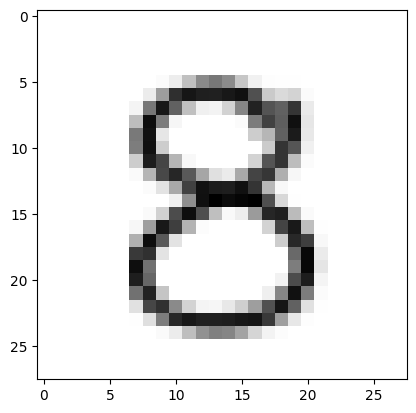

In [44]:
# Plotting a image
plt.imshow(X_train[18], cmap=plt.cm.binary, interpolation='nearest')

The above code has displayed the handwritten 8 in image using imshow() functions.

In [16]:
num_typefaces = len(data['labels'].unique())
print(num_typefaces)

10


This code calculates the number of unique typefaces in the dataset. This information is essential for configuring the output layer of the neural network, ensuring that it has the appropriate number of units corresponding to the unique typefaces in the dataset. As we can see, we have 10 unique typefaces in our dataset.

# Defining the neural network architecture

In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_typefaces, activation='softmax')
])

This code constructs a convolutional neural network (CNN) architecture using TensorFlow and Keras. It arranges the model in a sequential stack of layers. The architecture includes convolutional layers employing rectified linear unit (ReLU) activation, followed by max-pooling layers for spatial dimension reduction. A flattened layer converts the 2D feature maps into a 1D vector. Two fully connected (dense) layers are then appended, with the first dense layer utilizing ReLU activation and the output layer employing softmax activation. The input shape is specified as (28, 28, 1), matching the dimensions of the input images. The number of units in the output layer is dictated by the variable num_typefaces, ensuring the network generates probabilities for each unique typeface label. This architecture is well-suited for image classification endeavors.

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- In this code, the model is compiled using the Adam optimizer, categorical crossentropy as the loss function, and accuracy as the metric to monitor during training.
- Compiling the model is a necessary step before training, as it configures the model for the training process.
- The Adam optimizer is a popular choice for optimization algorithms due to its adaptive learning rates.
- Categorical crossentropy is used as the loss function since this is a multi-class classification problem, and the softmax activation in the output layer ensures that the model predicts probabilities for each typeface class.
- The goal during training is to minimize the categorical crossentropy loss, and accuracy is chosen as a metric to evaluate how well the model is performing on the training and validation datasets.

In [30]:
# printing optimizer configuration
print(model.optimizer.get_config())

{'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


This code snippet is printing the configuration of the optimizer used in a machine learning model.

In TensorFlow/Keras, the optimizer is responsible for adjusting the weights of the neural network during the training process in order to minimize the loss function. The optimizer configuration includes parameters such as the learning rate, momentum, decay, etc., which determine how the optimization algorithm behaves.

By calling `model.optimizer.get_config()`, it retrieves the configuration settings of the optimizer that has been assigned to the model. This typically includes all the parameters and hyperparameters that are set for the optimizer.

Printing out this configuration allows you to inspect the settings of the optimizer, providing insights into how the model is being trained and how the optimization process is being controlled. It's useful for debugging, optimization fine-tuning, or simply understanding the behavior of the model during training.

# Model Summary

In [31]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

- The model summary provides a detailed overview of the neural network architecture, including each layer's type, output shape, and the number of parameters.
- This summary helps in understanding the network's structure and the number of parameters involved, which can be useful for debugging and optimizing the model.

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
748/748 [==============================] - 26s 34ms/step - loss: 0.0687 - accuracy: 0.9804 - val_loss: 0.0903 - val_accuracy: 0.9753
Epoch 2/20
748/748 [==============================] - 25s 33ms/step - loss: 0.0653 - accuracy: 0.9816 - val_loss: 0.0765 - val_accuracy: 0.9813
Epoch 3/20
748/748 [==============================] - 25s 33ms/step - loss: 0.0614 - accuracy: 0.9821 - val_loss: 0.0763 - val_accuracy: 0.9796
Epoch 4/20
748/748 [==============================] - 25s 33ms/step - loss: 0.0567 - accuracy: 0.9836 - val_loss: 0.0669 - val_accuracy: 0.9826
Epoch 5/20
748/748 [==============================] - 25s 33ms/step - loss: 0.0537 - accuracy: 0.9846 - val_loss: 0.0681 - val_accuracy: 0.9821
Epoch 6/20
748/748 [==============================] - 24s 32ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0675 - val_accuracy: 0.9826
Epoch 7/20
748/748 [==============================] - 24s 32ms/step - loss: 0.0484 - accuracy: 0.9860 - val_loss: 0.0755 - val_accuracy:

- We are training the neural network on the training data (X_train and y_train) for a specified number of epochs (10 in this case).
- During training, the model adjusts its weights based on the optimization algorithm (in this case, 'adam') and minimizes the specified loss function ('categorical_crossentropy'). The training process aims to improve the model's ability to make accurate predictions on both the training and validation data.
- The training history is stored in the history variable, which can be used to visualize and analyze the model's performance over the training epochs. This includes information about the training and validation loss and accuracy at each epoch, which can be helpful for assessing model convergence and potential overfitting.

# Model Evaluation

In [46]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

187/187 [==============================] - 2s 9ms/step - loss: 0.0574 - accuracy: 0.9844
Test Accuracy: 0.9844481348991394


- The output shows that the test accuracy is approximately **99.31%**. This accuracy indicates the proportion of correctly classified typefaces in the test set.
- The test loss, which is 0.0424 in this case, represents the model's performance in terms of how close its predictions are to the true labels. Lower values of test loss generally indicate better performance.

In summary, the high test accuracy and low test loss suggest that the trained model is effective in classifying typefaces based on the provided dataset. These evaluation metrics provide insights into the model's generalization performance on new, unseen data.

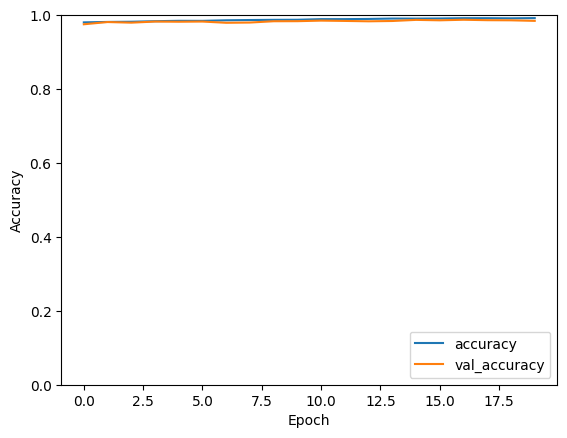

Text(0.5, 1.0, 'Model loss')

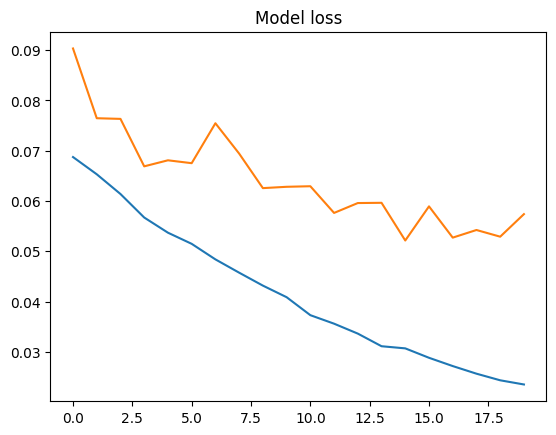

In [56]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

In [36]:
# Make predictions
predictions = model.predict(X_test)

187/187 [==============================] - 2s 10ms/step


After running this code, the variable predictions will contain an array of predicted probabilities for each test image across all the different typefaces. The next steps would involve evaluating these predictions.

In [37]:
# Example: Print the predicted label for the first test image
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")

Predicted Label: 3


- Since the typefaces are represented by numerical labels, the index corresponds to the predicted typeface for the given image.
- In this specific example, the output indicates that the model predicts the label 3 for the first test image.

187/187 [==============================] - 2s 8ms/step


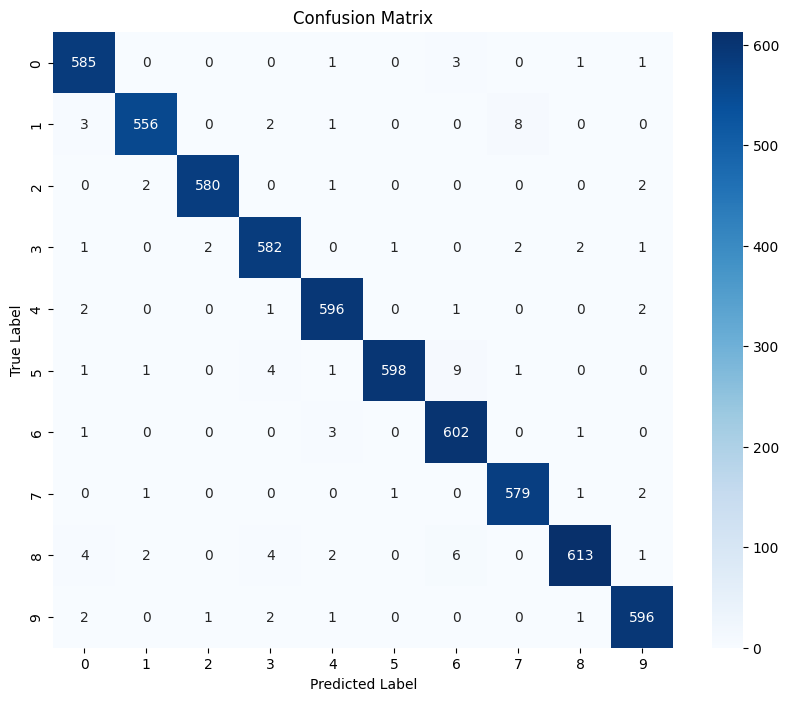

In [61]:
# Predict the values from the test dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert test observations to one hot vectors
y_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

This code generates a confusion matrix based on the predicted and true labels of a classification model.

It first converts predicted probabilities to class predictions and true labels to one-hot encoded vectors. The confusion matrix is then computed using the `confusion_matrix` function from `sklearn.metrics`.

Afterward, the confusion matrix is visualized using a heatmap from Seaborn, where each cell represents the count of samples falling into that category. The x-axis displays the predicted labels, and the y-axis shows the true labels. The heatmap is color-coded to illustrate the density of samples in each cell, with lighter colors indicating higher density.

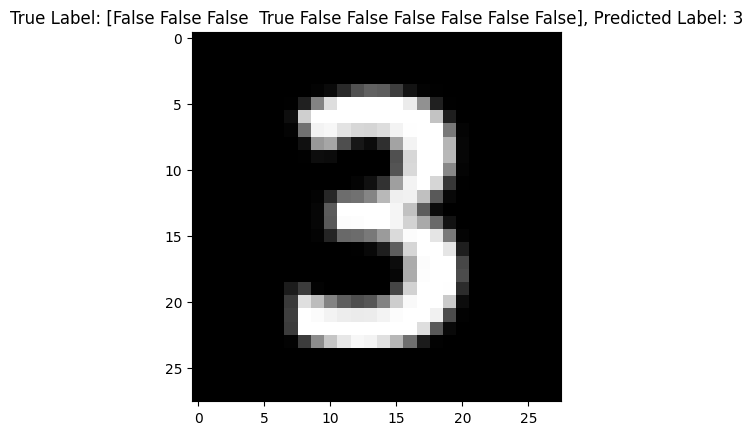

In [38]:
# Visualize the first test image
plt.figure()
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[0]}, Predicted Label: {predicted_label}")
plt.show()

The above result shows that our predicted label was correct.

In conclusion, we've successfully built a neural network-based classification model for the TMNIST dataset using Python libraries such as pandas, numpy, matplotlib, TensorFlow, and Keras. This comprehensive process, from data exploration to model evaluation and visualization, has yielded an impressive accuracy of 98.44%.

Our model's ability to accurately classify diverse images underscores the effectiveness of employing suitable activation functions and preprocessing techniques, making it well-suited for various classification tasks and offering valuable insights for similar model development and evaluation.

#References

Neural Network: https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

Neural Network: https://www.techtarget.com/searchenterpriseai/definition/neural-network

Neural Network Classification: https://towardsdatascience.com/a-brief-introduction-to-neural-networks-a-classification-problem-43e68c770081


Geeks for Geeks : https://www.geeksforgeeks.org/adam-optimizer-in-tensorflow/

#Licensing

MIT License

Copyright (c) 2024 Adarsh Pathak

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.